In [1]:
import json
import os
from pathlib import Path
import datetime
import matplotlib.pyplot as plt


In [2]:
ROOT = "scrapped_data"
DIRECTORIES = 1
FILES = 2



In [3]:
tweets_stats_per_hour = [{"number_of_tweets": 0, "hour": hour, "like_count": 0, "reply_count": 0} for hour in range(24)]
print(tweets_stats_per_hour)

[{'number_of_tweets': 0, 'hour': 0, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 1, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 2, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 3, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 4, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 5, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 6, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 7, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 8, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 9, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 10, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 11, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 12, 'like_count': 0, 'reply_count': 0}, {'number_of_tweets': 0, 'hour': 13, 'like_count': 0, 'reply_count': 0}, {

In [4]:
def get_tweet_hour(tweet: dict) -> int:
    createTime = datetime.datetime.fromisoformat(tweet["created_at"].replace('Z', '+00:00'))
    return createTime.hour

In [5]:
files = []
directories = next(os.walk(ROOT))[DIRECTORIES]

for directory in directories:
    directory = Path(ROOT, directory)
    directory_files = next(os.walk(directory))[FILES]
    for file in directory_files:
        files.append(Path(directory, file))

print(files)



[WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/0.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/10.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/100.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1000.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1001.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1002.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1003.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1004.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1005.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1006.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1007.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1008.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1009.json'), WindowsPath('scrapped_data/GOOGL_2014-01-01_2022-10-10/1

In [6]:
for file in files:
    with open(file) as f:
        data = json.load(f)
        for tweet in data:
            tweet_hour = get_tweet_hour(tweet)
            tweets_stats_per_hour[tweet_hour]["number_of_tweets"] += 1
            tweets_stats_per_hour[tweet_hour]["like_count"] += tweet["public_metrics"]["like_count"]
            tweets_stats_per_hour[tweet_hour]["reply_count"] += tweet["public_metrics"]["reply_count"]
print(tweets_stats_per_hour)

[{'number_of_tweets': 104680, 'hour': 0, 'like_count': 14241683, 'reply_count': 989880}, {'number_of_tweets': 89199, 'hour': 1, 'like_count': 12097499, 'reply_count': 777921}, {'number_of_tweets': 84785, 'hour': 2, 'like_count': 12186665, 'reply_count': 1031502}, {'number_of_tweets': 77238, 'hour': 3, 'like_count': 9794174, 'reply_count': 1255727}, {'number_of_tweets': 73169, 'hour': 4, 'like_count': 9431879, 'reply_count': 961029}, {'number_of_tweets': 69123, 'hour': 5, 'like_count': 7922912, 'reply_count': 536554}, {'number_of_tweets': 68504, 'hour': 6, 'like_count': 6475213, 'reply_count': 571009}, {'number_of_tweets': 70089, 'hour': 7, 'like_count': 6469159, 'reply_count': 493398}, {'number_of_tweets': 74664, 'hour': 8, 'like_count': 5977703, 'reply_count': 619578}, {'number_of_tweets': 79123, 'hour': 9, 'like_count': 6346459, 'reply_count': 735154}, {'number_of_tweets': 86335, 'hour': 10, 'like_count': 6225273, 'reply_count': 722108}, {'number_of_tweets': 99951, 'hour': 11, 'like_

In [7]:
x = [tweet_stats["hour"] for tweet_stats in tweets_stats_per_hour]

<BarContainer object of 24 artists>

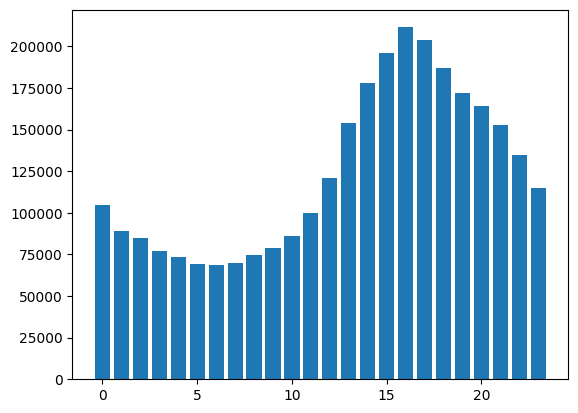

In [8]:
y = [tweet_stats["number_of_tweets"] for tweet_stats in tweets_stats_per_hour]
plt.bar(x, y)

<BarContainer object of 24 artists>

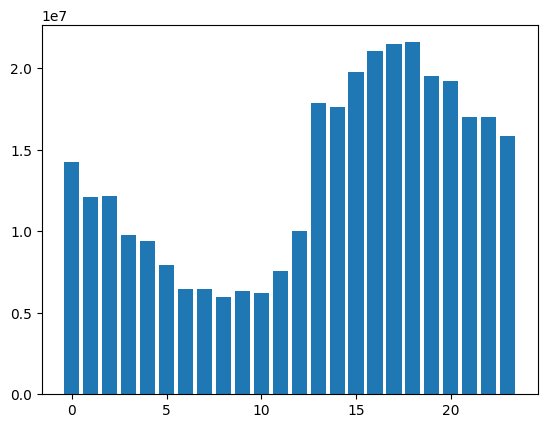

In [9]:
y = [tweet_stats["like_count"] for tweet_stats in tweets_stats_per_hour]
plt.bar(x, y)

<BarContainer object of 24 artists>

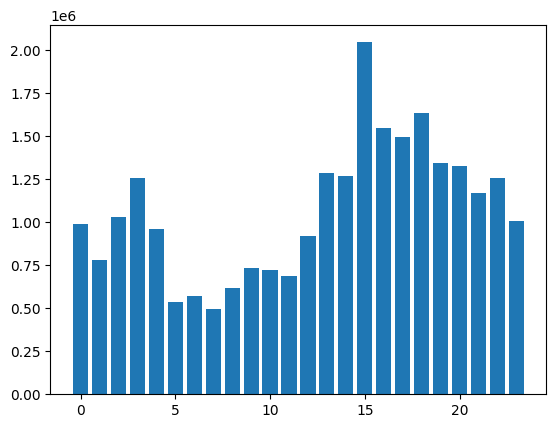

In [10]:
y = [tweet_stats["reply_count"] for tweet_stats in tweets_stats_per_hour]
plt.bar(x, y)

In [11]:
total_tweets = sum([tweet_stats["number_of_tweets"] for tweet_stats in tweets_stats_per_hour])
distribution = []
current_distribution = 0.0
for tweet_stats in tweets_stats_per_hour:
    current_distribution += tweet_stats["number_of_tweets"] / total_tweets
    distribution.append(current_distribution)

print(distribution)

[0.035289374217046504, 0.06535984508814252, 0.09394228292719763, 0.11998050117114335, 0.14464699163815783, 0.16794950801191505, 0.1910433491598378, 0.21467152024790212, 0.2398420001537252, 0.26651568334225567, 0.29562065203760063, 0.32931580146794087, 0.37013018097771927, 0.421972321371984, 0.48203437781071035, 0.5480135062427267, 0.6192931202576111, 0.6879907576090606, 0.7509385328412328, 0.8088437167518672, 0.8642808694374061, 0.915710716130224, 0.961222142363026, 0.9999999999999999]


<BarContainer object of 24 artists>

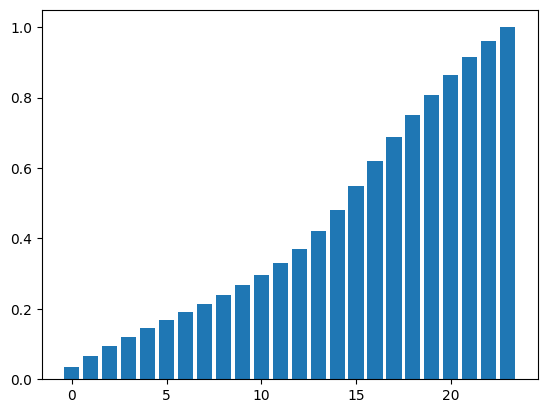

In [12]:
plt.bar(x, distribution)